Data Exploration

In [55]:
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv('Titanic_train.csv')

# Display the first few rows
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Examine the features, their types, and summary statistics

In [57]:
# Check the data types and missing values
print(data.info())

# Get summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

 Create visualizations such as histograms, box plots, or pair plots

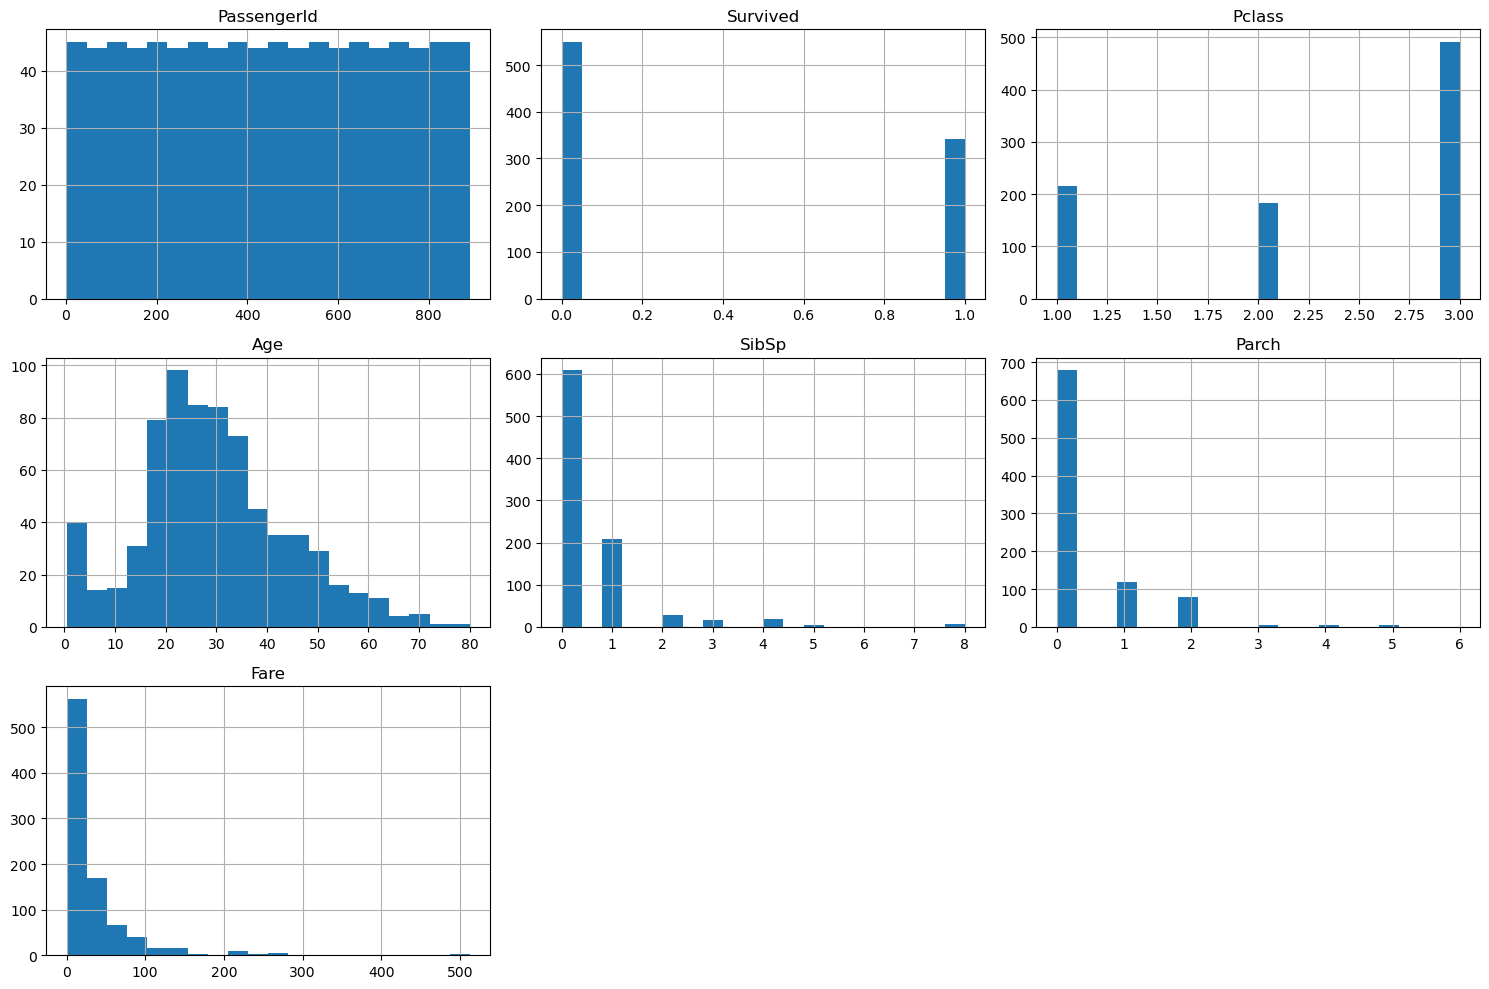

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for feature distributions
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()



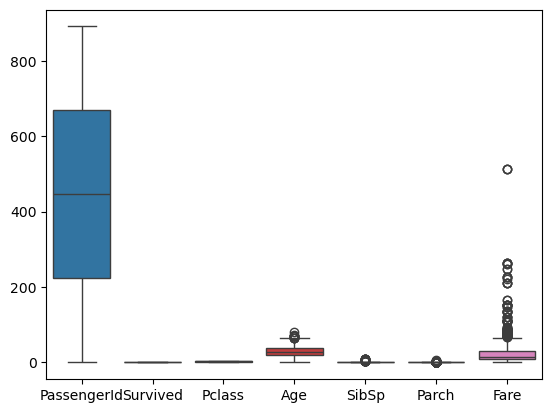

In [61]:
# Box plots to visualize outliers
sns.boxplot(data=data)
plt.show()



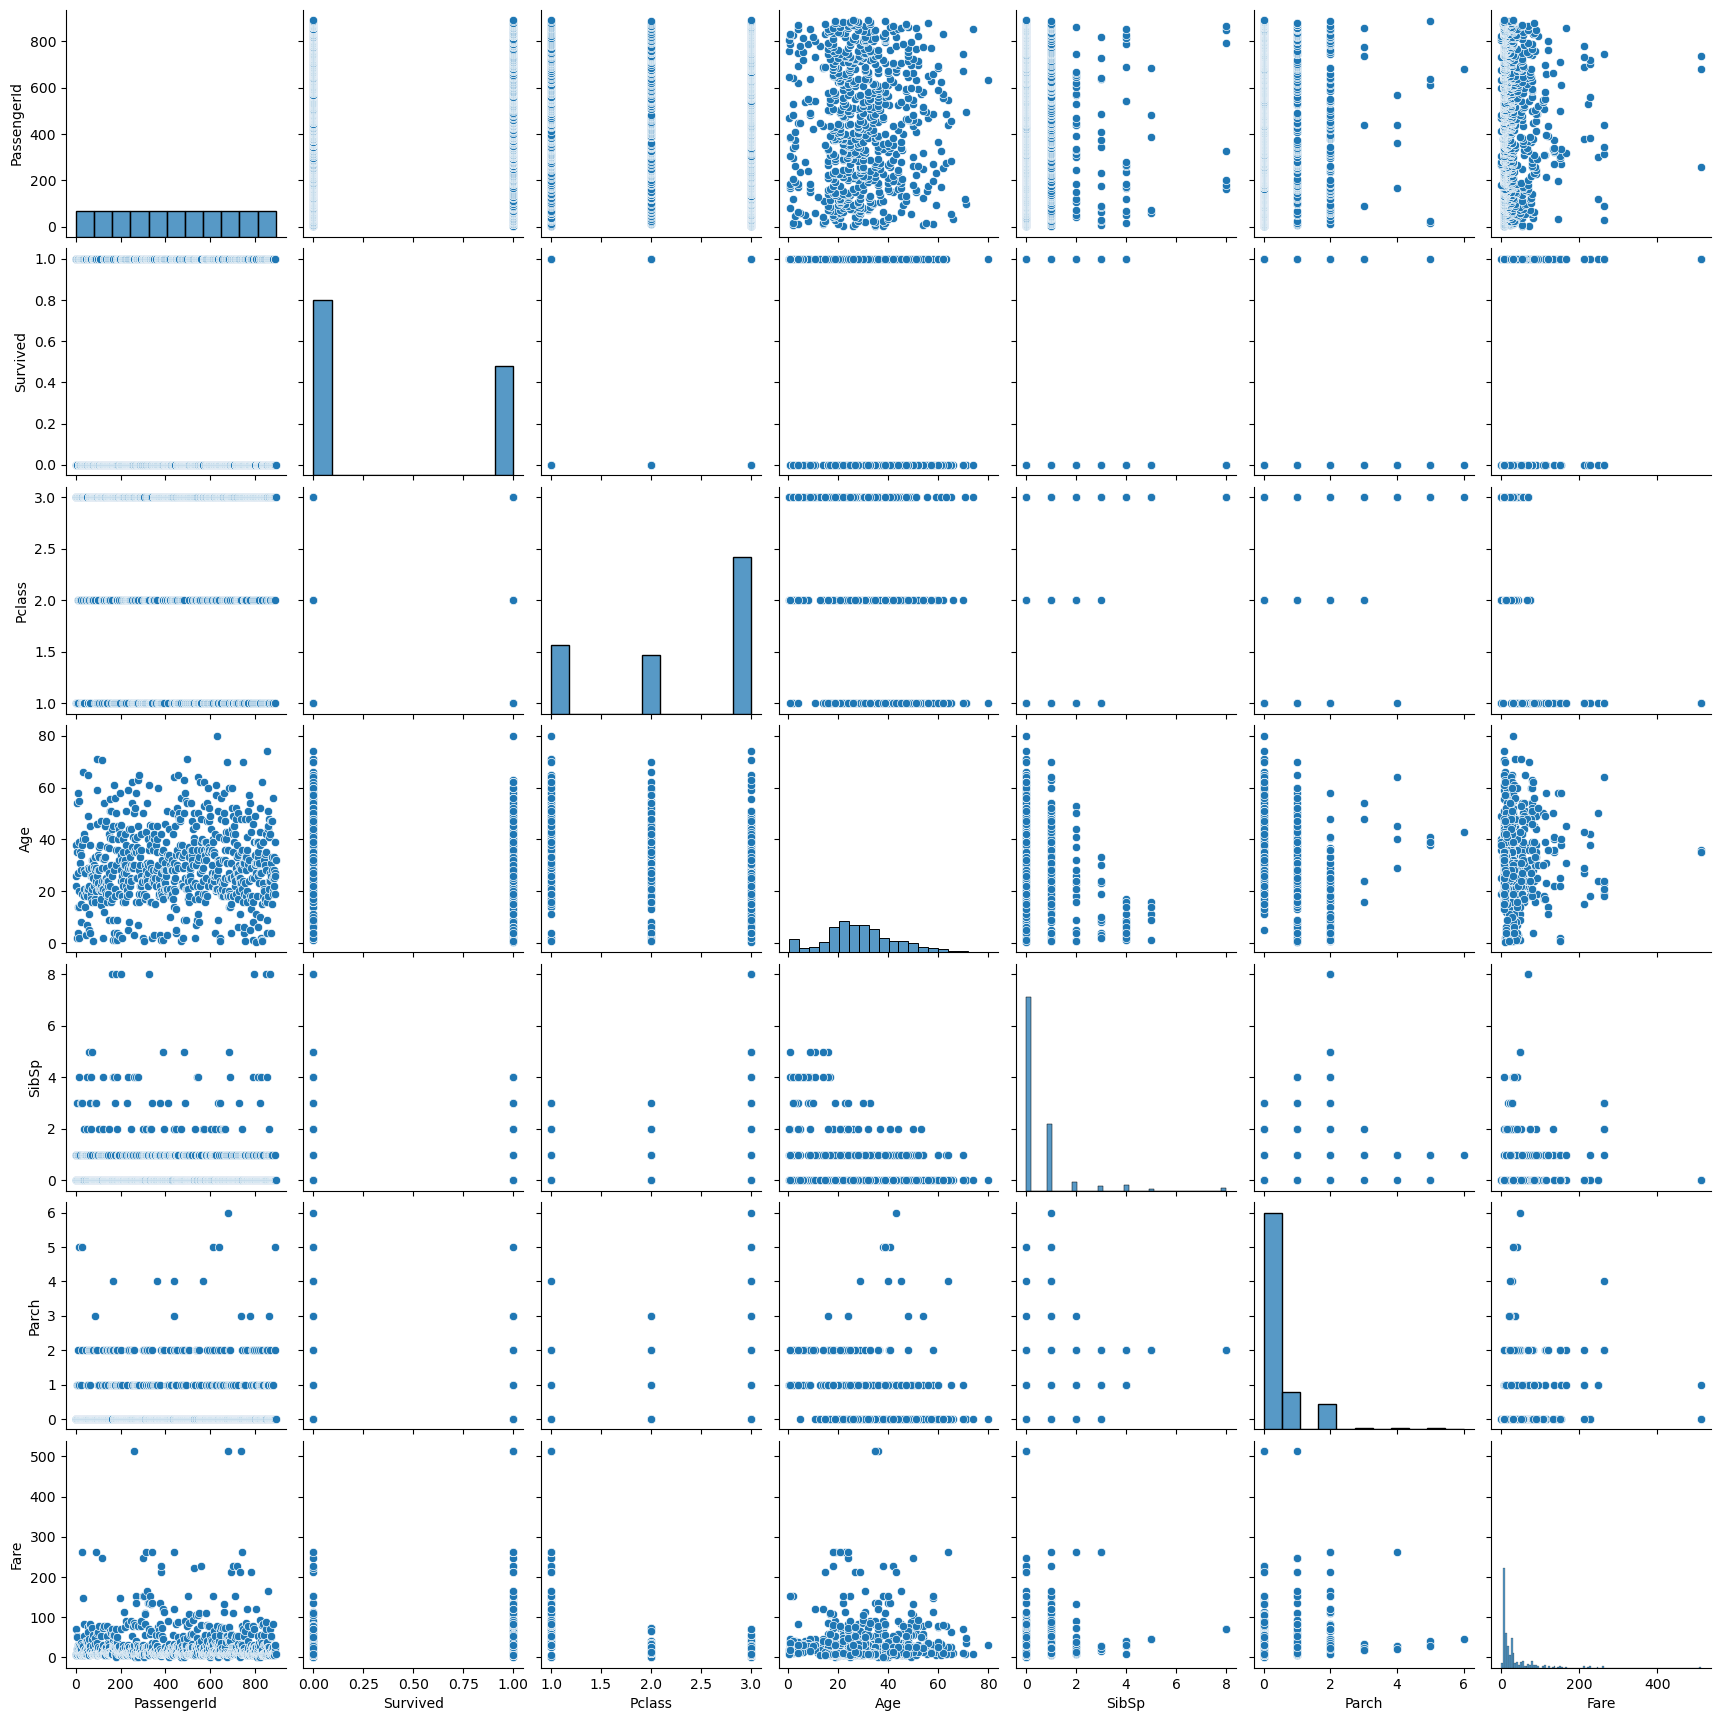

In [63]:
# Pair plot to visualize relationships between features
sns.pairplot(data)
plt.show()


Analyze any patterns or correlations observed in the data

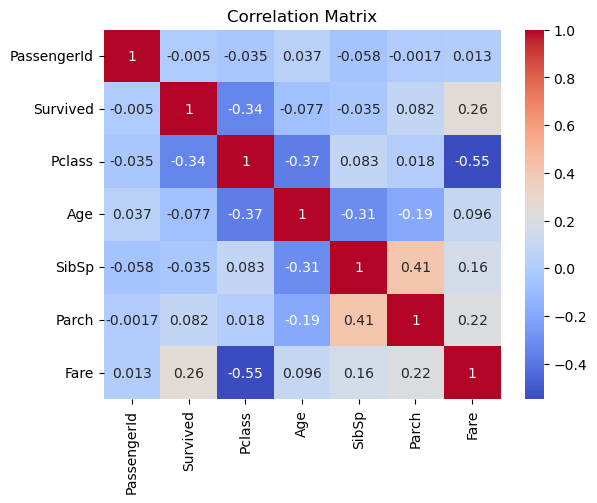

In [65]:
# Filter only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


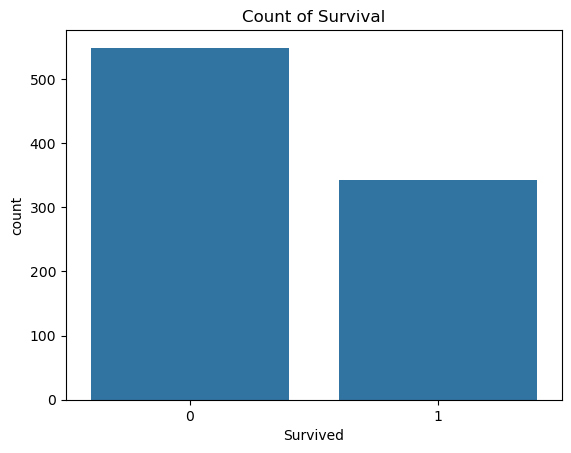

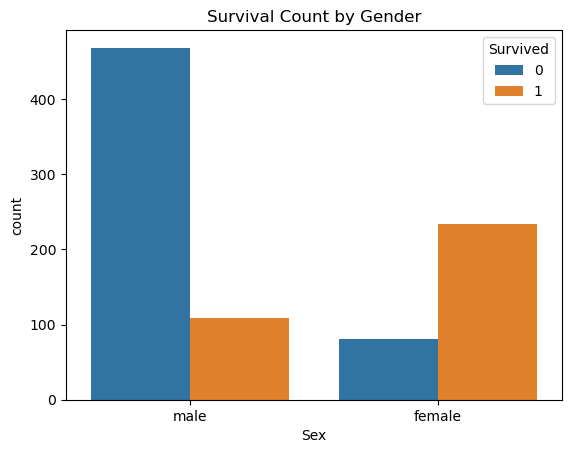

In [67]:
# Check the column names
print(data.columns)

# Countplot for the target variable 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Count of Survival')
plt.show()

# Countplot for the 'Sex' variable with respect to 'Survived'
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Gender')
plt.show()

Data Preprocessing

In [75]:
#Handling Missing VValueError# Impute missing values
# For Age, we will fill with the median as it's a numerical column
data['Age'].fillna(data['Age'].median(), inplace=True)

# For Embarked, we can fill with the mode as it's a categorical column
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Check if missing values are handled
print(data.isnull().sum())
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [77]:
#Encode Categorical Variableabs
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)  # Dropping columns not useful for modeling

# Check the updated dataset
print(data.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


Model Building

a. Build the Logistic Regression Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into features (X) and target (y)
X = data.drop(columns=['Survived'])  # Features
y = data['Survived']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

 Model Evaluation

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')



Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76
ROC AUC Score: 0.88


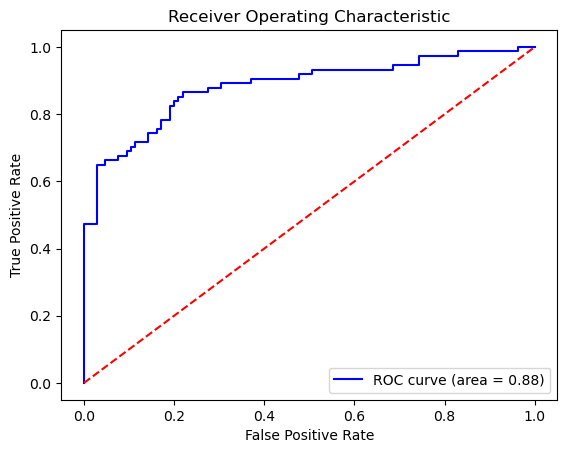

In [84]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Interpret the Coefficients

In [87]:
# Coefficients of the model
coefficients = model.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(coef_df)


      Feature  Coefficient
0      Pclass    -0.937033
1         Age    -0.030494
2       SibSp    -0.294911
3       Parch    -0.108488
4        Fare     0.002592
5    Sex_male    -2.593063
6  Embarked_Q    -0.111237
7  Embarked_S    -0.398404
